In [8]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = 'Titanic-Dataset.csv' 
titanic_data = pd.read_csv(file_path)

# Inspeccionar las primeras 5 filas del dataset
print(titanic_data.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


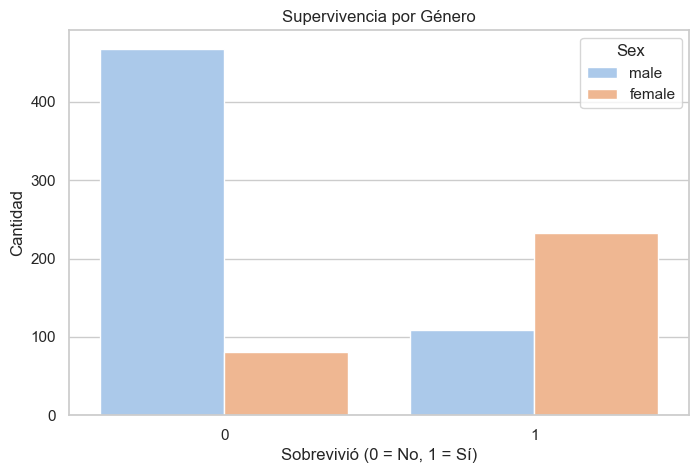

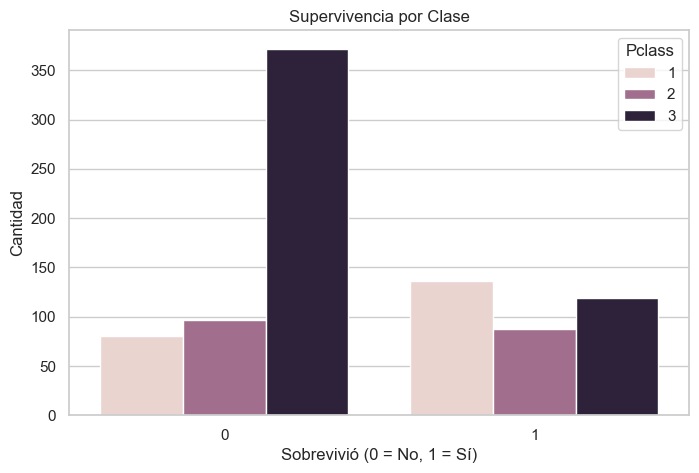

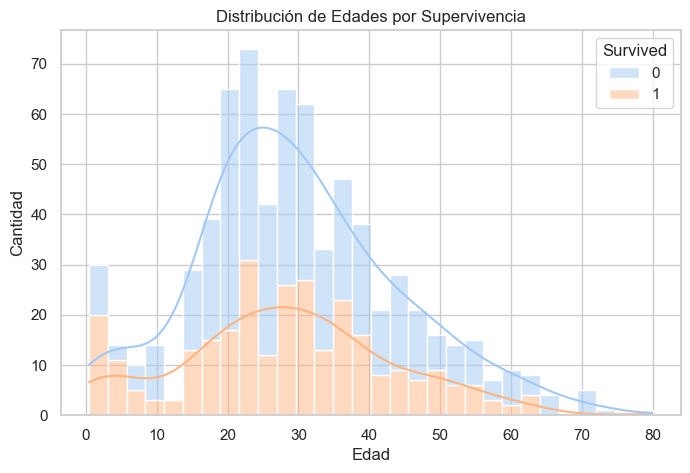

In [20]:
# Configuración general de gráficos
sns.set(style="whitegrid", palette="pastel")

# Supervivencia por Género
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='Survived', hue='Sex')
plt.title('Supervivencia por Género')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Supervivencia por Clase
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic_data, x='Survived', hue='Pclass')
plt.title('Supervivencia por Clase')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Cantidad')
plt.show()

# Distribución de Edades
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_data, x='Age', kde=True, bins=30, hue='Survived', multiple="stack")
plt.title('Distribución de Edades por Supervivencia')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.show()

In [10]:
# Copiar el dataset original para limpiarlo
titanic_cleaned = titanic_data.copy()

# Manejar valores faltantes
titanic_cleaned['Age'] = titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median())
titanic_cleaned['Embarked'] = titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0])

# Eliminar columnas con demasiados valores faltantes y las irrelevantes
titanic_cleaned = titanic_cleaned.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])

# Convertir variables categóricas a numéricas (One-Hot Encoding)
titanic_cleaned = pd.get_dummies(titanic_cleaned, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar los cambios
print(titanic_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB
None


In [30]:
from sklearn.model_selection import train_test_split

# Seleccionar características (X) y la variable objetivo (y)
X = titanic_cleaned.drop(columns=['Survived'])
y = titanic_cleaned['Survived']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")

Dimensiones del conjunto de entrenamiento: (712, 8)
Dimensiones del conjunto de prueba: (179, 8)


In [32]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo
model = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



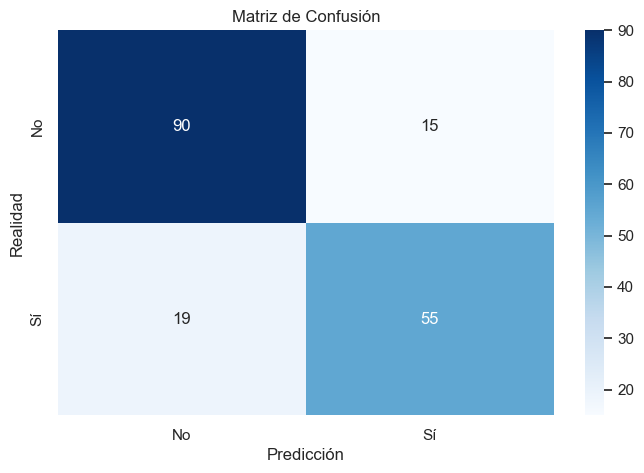

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Métricas de evaluación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Sí'], yticklabels=['No', 'Sí'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()